# Python for Economists
<center>
**Randall Romero-Aguilar PhD**
<br>    
[rromero@secmca.org](mailto:rromero@secmca.org)
</center>    

<br>
<br>
<p style="font-size:12px">This article originally appeared in Spanish as [SECMCA Regional Economic Notes No. 93](http://www.secmca.org/NOTAS_ECONOMICAS/articulo93NOV2017.pdf) in December 2017.  This Jupyter notebook is a slightly modified version of the original, and was prepared on July 28, 2018.</p>


The use of programming languages has become increasingly necessary in many of the tasks that we economist do, either because the theoretic models we develop lack analytic solutions, or because the new econometric estimator we wish to use is not yet available in a program with a graphical user interface (GUI, where we could just click with a mouse), or just because it is not efficient to analyze huge datasets with spreadsheets.

<br>
Those who wish to exploit the advantages of programming to do these tasks must first decide which of many programming languages to learn. For instance, to a greater or lesser extend the languages R, Python, Julia, Fortran, Gauss, and MATLAB are all used by economists. MATLAB has been especially popular in this field, and there are many tools that have been developed to be run in this program, among them [DYNARE](http://www.dynare.org/) and [IRIS](https://github.com/IRIS-Solutions-Team/IRIS-Toolbox/wiki/IRIS-Macroeconomic-Modeling-Toolbox) (to solve and estimate DSGE models), [CompEcon](http://www4.ncsu.edu/~pfackler/compecon/toolbox.html) (for computational economics), and [Econometrics](http://www.spatial-econometrics.com/) (for spacial econometrics).

<br>
Despite the fact that Python is not yet as popular as [MATLAB](https://www.mathworks.com) among economists, its popularity has certainly skyrocketed in recent years. For example, the following books use Python to do typical economists tasks:

* [QuantEcon](http://www.quantecon.org/) by Thomas Sargent and John Stachurski.
* [Economic Dynamics: Theory and Computation](http://www.amazon.com/dp/0262012774/ref=rdr_ext_tmb), by Stachurski.
* [Python for Econometrics](http://www.kevinsheppard.com/Python_for_Econometrics), by Kevin Sheppard.

<br>
Python is a versatile and easy-to-learn language ---in fact [it is used extensively](http://m.cacm.acm.org/blogs/blog-cacm/176450-python-is-now-the-most-popular-introductory-teaching-language-at-top-us-universities/fulltext) in America's best universities to teach introductory programming courses. Its syntax is very clear, which makes developing and maintaining code easy. Because it is one of the most popular languages among computer programmers, there are abundant resources to learn it (books, Internet pages). It is an excellent tool to perform scientific calculation tasks (thanks to packages such as [Numpy](http://www.numpy.org/) and [Scipy](https://scipy.org/)), data management ([Pandas](http://pandas.pydata.org/)), visualization ([Matplotlib](http://matplotlib.org/)) and econometric modeling ([Statsmodels](http://www.statsmodels.org)).

<br>
Another advantage of using Python is that, unlike proprietary programs, Python and many of these complementary packages are completely free. The best way to get Python is through [Anaconda](https://www.continuum.io/downloads), a free distribution that includes more than 300 very useful packages in science, mathematics, engineering, and data analysis. Besides Python, Anaconda includes tools such as IPython (to run Python interactively), [Jupyter](http://jupyter.org/) (an editor that allows combining text, code and results in a single file, excellent for documenting your work), Spyder (a GUI for code editing, similar to that of MATLAB) and Conda (allows to install and update packages).

<br>
If you want to start working with Python, you should consider two issues. First, there are currently two versions of Python that are not entirely compatible with each other, the 2 (whose last update is 2.7) and the 3 (currently updated to 3.6). Personally, I recommend working with version 3.6 because it has significant improvements over version 2.7, and most of the packages needed to work in typical economists tasks have already been ported to 3.6.

<br>
Second, although Spyder facilitates code editing, more advanced users may prefer [PyCharm](https://www.jetbrains.com/pycharm/download/), an excellent Python editor whose “Community” version can be used for free. This editor makes it much easier to edit programs, because of features such as *autocomplete* (especially useful when we have not yet memorized Python functions), *syntax highlighting* (shows keywords in different color, to make it easier to understand the code's logic), and *debugger* (to partially run a program when it is necessary to find a bug).


<br>
The purpose of this note is to illustrate some of the common tasks that economists can do using Python. First, we use numerical techniques to solve two Cournot competition models presented by Miranda and Fackler (2002) using the "CompEcon-python" package (<small>This package was developed by the author and is based precisely on the *CompEcon toolbox*  for MATLAB from Miranda and Fackler</small>), which is freely available at [Github](https://github.com/randall-romero/CompEcon-python) (<small>Readers interested in the topic of computational economics will find more of these examples in Romero-Aguilar (2016)</small>). Second, it illustrates how to automate the collection of Internet data and its presentation in tables and graphs. Third, some examples of econometric models estimated with Python are shown.

<br>
For each of the problems, I provide Python code to solve it, along with brief explanations of how this code works. However, this note is not intended to teach programming in Python because, as mentioned above, there are already many high quality teaching resources for this purpose, including the site of [Google developers](https://developers.google.com/edu/python/), the site [learnpython](https://www.learnpython.org/), and several online courses at [edx](https://www.edx.org/course?search_query=python). Likewise, in the first two examples, the numerical methods implemented in Python are presented concisely, but readers interested in this topic are advised to consult the textbooks of Miranda and Fackler (2002), Judd (1998), and Press (2007)

# Example 1: A 2-firms Cournot model

<br>
Assume the market is controlled by two firms that compete with each other. For this duopoly, the inverse of the demand function is given by
\begin{equation*}
P(q) = q^{-\alpha}
\end{equation*}
and both firms face quadratic costs
\begin{align*}
C_1 &= \tfrac{1}{2}\beta_1q_1^2 \\
C_2 &= \tfrac{1}{2}\beta_2q_2^2 
\end{align*}

Firms profits are
\begin{align*}
\pi_1\left(q_1, q_2\right) &=P\left(q_1+q_2\right)q_1 - C_1\left(q_1\right) \\
\pi_2\left(q_1, q_2\right) &=P\left(q_1+q_2\right)q_2 - C_2\left(q_2\right) 
\end{align*}

In a Cournot equilibrium, each firm maximizes its profits taking as given the other firm's output. Thus, it must follow that 
\begin{align*}
\frac{\partial \pi_1\left(q_1, q_2\right)}{\partial q_1} &= P\left(q_1+q_2\right) + P'\left(q_1+q_2\right)q_1 - C'_1\left(q_1\right) = 0\\
\frac{\partial \pi_2\left(q_1, q_2\right)}{\partial q_2}  &= P\left(q_1+q_2\right) + P'\left(q_1+q_2\right)q_2 - C'_2\left(q_2\right) = 0
\end{align*}

Therefore, equilibrium output levels for this market are given by the solution to this nonlinear equation system
\begin{equation} \label{eq:fzero}
f\left(q_1, q_2\right) = \begin{bmatrix}
\left(q_1+q_2\right)^{-\alpha} - \alpha q_1 \left(q_1+q_2\right)^{-\alpha - 1} - \beta_1q_1 \\
\left(q_1+q_2\right)^{-\alpha} - \alpha q_2 \left(q_1+q_2\right)^{-\alpha - 1} - \beta_2q_2\end{bmatrix} 
= \begin{bmatrix}0 \\ 0\end{bmatrix}\tag{1}
\end{equation}

## Newton's method
To find the root of the function defined in (1) we will use Newton's method. In general, this method is applied to the function $f: \Re^n \to \Re^n$ to find some (<small>Notice that, depending on the function, there could be more than one solution, or no solution at all.</small>) value $x^*$ such that $f(x^*)=0$. To that end, we start with a value $x_0 \in \Re^n$ and make the recursion
\begin{equation}\label{eq:newton}
x_{i+1} = x_i - J^{-1}(x_i) f(x_i) \tag{2}
\end{equation}
where $J(x_i)$ corresponds to the Jacobian of $f$ evaluated at $x_0$. In theory, following this recursion $x_i$ converges to $x^*$ as long as the $f$ function is continuously differentiable and the initial value $x_0$ is “sufficiently close” to the $x^*$ root.

## Solving the model with Python

First, we begin a Python session and import `compecon`.  This package is available in pip, and can be installed by typing
    
    pip install compecon

in a command window.    

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from compecon import NLP, gridmake
from compecon.demos import demo

To solve this model computationally, we need to assign values to the parameters, so we set $\alpha=0.625$, $\beta_1=0.6$ and $\beta_2=0.8$. 

In [2]:
alpha = 0.625
beta = np.array([0.6, 0.8])

The unknowns in our problem are the firms' output levels, $q_1$ and $q_2$. We define the `market` function to tell us total output and resulting price, given the levels of $q_1$ y $q_2$. Notice that both quantities are passed to this function in the  `q` vector

In [3]:
def market(q):
    quantity = q.sum()
    price = quantity ** (-alpha)
    return price, quantity

Then, we define the `cournot` function, returning a two-element tuple: the objective function and its Jacobian matrix, both evaluated in a pair of quantities contained by the `q` vector. To make the code easier, notice that the (1) function can be written more succinctly as
\begin{equation*} 
f\left(q_1, q_2\right) = \begin{bmatrix}
P + \left(P' - c_1\right)q_1 \\
P + \left(P' - c_2\right)q_2\end{bmatrix}
= \begin{bmatrix}0 \\ 0\end{bmatrix}
\end{equation*}
and its Jacobian matrix is

\begin{equation*} 
J\left(q_1, q_2\right) = \begin{bmatrix}
2P' + P''q_1 - c_1 & P' + P''q_1 \\
P' - P''q_2 & 2P' + P''q_2 - c_2\end{bmatrix}
\end{equation*}

<br>
If we define total output as $Q=q_1 + q_2$, notice also that 
\begin{equation*}
P' = -\alpha\frac{P}{Q} \qquad\text{y que} \qquad P''=-(\alpha+1)\frac{P'}{Q}
\end{equation*}

In [4]:
def cournot(q):
    P, Q = market(q)
    P1 = -alpha * P/Q
    P2 = (-alpha - 1) * P1 / Q
    fval = P + (P1 - beta) * q
    fjac = np.diag(2*P1 + P2*q - beta) + np.fliplr(np.diag(P1 + P2*q))
    return fval, fjac

Next, we compute the equilibrium using Newton's method (equation (2)) to find the root of the `cournot` function. We set $q_0 = \begin{bmatrix}0.2 & 0.2\end{bmatrix}'$ as our initial value and iterate until the norm of the change between two successive values of the recursion is less than $10^{-10}$.

In [5]:
q = np.array([0.2, 0.2])

for it in range(40):
    f, J = cournot(q)
    step = -np.linalg.solve(J, f)
    q += step
    if np.linalg.norm(step) < 1.e-10: break

price, quantity = market(q)
print(f'\nCompany 1 produces {q[0]:.4f} units, while company 2 produces {q[1]:.4f} units.')
print(f'Total production is {quantity:.4f} and price is {price:.4f}')


Company 1 produces 0.8396 units, while company 2 produces 0.6888 units.
Total production is 1.5284 and price is 0.7671


After just five iterations, Newton's method converges to the solution, which Python prints to screen:
```
Company 1 produces 0.8396 units, while company 2 produces 0.6888 units.
Total production is 1.5284 and price is 0.7671
```

<br>
We see that the code has found the equilibrium to this market. 

<br>
The `compecon` package provides the `NLP` (non-linear problem) class, useful to solve last problem without the need of coding Newton's algorithm. To use it, we create an instance of `NLP` from the `cournot` function, and simply call the `newton` method, using `q0` as initial value. 

In [6]:
q0 = np.array([0.2, 0.2])
cournot_problem = NLP(cournot)
q = cournot_problem.newton(q0)

price, quantity = market(q)
print(f'\nCompany 1 produces {q[0]:.4f} units, while' +
 f' company 2 produces {q[1]:.4f} units.')
print(f'Total production is {quantity:.4f} and price is {price:.4f}')


Company 1 produces 0.8396 units, while company 2 produces 0.6888 units.
Total production is 1.5284 and price is 0.7671


After completing this code block, Python prints the following to screen:
```
Company 1 produces 0.8396 units, while company 2 produces 0.6888 units.
Total production is 1.5284 and price is 0.7671
```
<br>
As expected, we got the same result.

Figure 1 illustrates the problem we just solved, where the axes represent the output levels of each firm. The quasi-vertical white line represents the profit-maximizing output level for firm 1, taking the output of firm 2 as given. Similarly, the quasi-horizontal line represents the profit maximizing output level for firm 2, given firm 1 output. The solution to the problem corresponds to the intersection of these two lines. See also the path to convergence (blue line) from the initial $q_0 = \begin{bmatrix}0.2 & 0.2\end{bmatrix}'$ point to the solution.

##### Figure 1 Convergence of Newton's method

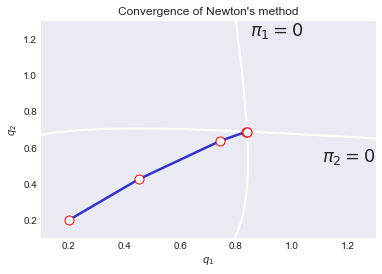

In [7]:
n = 100
q1 = np.linspace(0.1, 1.5, n)
q2 = np.linspace(0.1, 1.5, n)
z = np.array([cournot(q)[0] for q in gridmake(q1, q2).T]).T

steps_options = {'marker': 'o',
                 'color': (0.2, 0.2, .81),
                 'linewidth': 2.5,
                 'markersize': 9,
                 'markerfacecolor': 'white',
                 'markeredgecolor': 'red'}

contour_options = {'levels': [0.0],
                   'colors': 'white',
                   'linewidths': 2.0}


Q1, Q2 = np.meshgrid(q1, q2)
Z0 = np.reshape(z[0], (n,n), order='F')
Z1 = np.reshape(z[1], (n,n), order='F')

methods = ['newton', 'broyden']
cournot_problem.opts['maxit', 'maxsteps', 'all_x'] = 10, 0, True

qmin, qmax = 0.1, 1.3
x = cournot_problem.zero(method='newton')
demo.figure("Convergence of Newton's method", '$q_1$', '$q_2$',
            [qmin, qmax], [qmin, qmax])
plt.contour(Q1, Q2, Z0, **contour_options)
plt.contour(Q1, Q2, Z1, **contour_options)

plt.plot(*cournot_problem.x_sequence, **steps_options)

demo.text(0.85, qmax, '$\pi_1 = 0$', 'left', 'top')
demo.text(qmax, 0.55, '$\pi_2 = 0$', 'right', 'center')

# Example 2: Solving an Cournot oligopoly model by collocation

<br>
To illustrate the implementation of the collocation method for implicit function problems, consider the case of a Cournot oligopoly. In the standard microeconomic model of the firm, the firm maximizes its profits by matching marginal revenue to marginal cost (MC). An oligopolistic firm, recognizing that its actions affect the price, knows that its marginal revenue is $p + q \frac{dp}{dq}$, where $p$ is the price, $q$ the quantity produced, and $\frac{dp}{dq}$ is the marginal impact of the product on the market price. Cournot's assumption is that the company acts as if none of its production changes would provoke a reaction from its competitors. This implies that:
\begin{equation}
    \frac{dp}{dq} = \frac{1}{D'(p)} \tag{3}
\end{equation}

where $D(p)$ is the market demand curve.

<br>
Suppose we want to derive the firm's effective supply function, which specifies the amount $q = S(p)$ that it will supply at each price. The effective supply function of the firm is characterized by the functional equation
\begin{equation}
    p + \frac{S(p)}{D'(p)} - MC(S(p)) = 0 \tag{4}
\end{equation}

for every price $p>0$. In simple cases, this function can be found explicitly. However, in more complicated cases, there is no explicit solution. Suppose for example that demand and marginal cost are given by
\begin{equation*}
D(p) = p^{-\eta}  \qquad\qquad CM(q) = \alpha\sqrt{q} + q^2 
\end{equation*}

so that the functional equation to be solved for $S(p)$ is
\begin{equation} \label{eq:funcional}
\left[p - \frac{S(p)p^{\eta+1}}{\eta}\right] - \left[\alpha\sqrt{S(p)} + S(p)^2\right] = 0 \tag{5}
\end{equation}

## The collocation method
In equation (5), the unknown is the supply *function* $S(p)$, which makes (5) and infinite-dimension equation. Instead of solving the equation directly, we will approximate its solution using $n$ Chebyshev polynomials $\phi_i(x)$, which are defined recursively for $x \in [0,1]$ as:
\begin{align*}
\phi_0(x) & = 1 \\
\phi_1(x) & = x \\
\phi_{k + 1}(p_i) & = 2x \phi_k(x) - \phi_{k-1}(x), \qquad \text{for} k = 1,2, \dots
\end{align*}

<br>
In addition, instead of requiring that both sides of the equation be exactly equal over the entire domain of $p \in \Re^+$, we will choose $n$ Chebyshev nodes $p_i$ in the interval $[a, b]$:
\begin{equation} \label{eq:chebynodes}
p_i = \frac{a + b}{2} + \frac{ba}{2}\ cos\left(\frac{n-i + 0.5}{n}\pi\right), \qquad\text{for } i = 1,2, \dots, n  \tag{6}
\end{equation}

<br>
Thus, the supply is approximated by
\begin{equation*}
S(p_i) = \sum_{k = 0}^{n-1} c_{k}\phi_k(p_i)
\end{equation*}

Substituting this last expression in (5) for each of the placement nodes (Chebyshev in this case) results in a non-linear system of $ n $ equations (one for each node) in $ n $ unknowns $ c_k $ (one for each polynomial of Cheybshev), which in principle can be solved by Newton's method, as in the last example. Thus, in practice, the system to be solved is

\begin{equation} \label{eq:collocation}
\left[p_i - \frac{\left(\sum_{k=0}^{n-1}c_{k}\phi_k(p_i)\right)p_i^{\eta+1}}{\eta}\right] - \left[\alpha\sqrt{\sum_{k=0}^{n-1}c_{k}\phi_k(p_i)} + \left(\sum_{k=0}^{n-1}c_{k}\phi_k(p_i)\right)^2\right] = 0  \tag{7}
\end{equation}

for $i=1,2,\dots,n$ and for $k=1,2,\dots,n$.

## Solving the model withPython
To solve this model we start a new Python session:

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from compecon import BasisChebyshev, NLP, nodeunif
from compecon.demos import demo

and set the $\alpha$ and $\eta$ parameters

In [9]:
alpha, eta = 1.0, 3.5

For convenience, we define a `lambda` function to represent the demand

In [10]:
D = lambda p: p**(-eta)

We will approximate the solution for prices in the $p\in [\frac{1}{2}, 2]$ interval, using 25 collocation nodes. The `compecon` library provides the `BasisChebyshev` class to make computations with Chebyshev bases:

In [11]:
n, a, b =  25, 0.5, 2.0
S = BasisChebyshev(n, a, b, labels=['price'], l=['supply'])

Let's assume that our first guess is $S(p)=1$. To that end, we set the value of `S` to one in each of the nodes

In [12]:
p = S.nodes
S.y = np.ones_like(p)

It is important to highlight that in this problem the unknowns are the $c_k$ coefficients from the Chebyshev basis; however, an object of  `BasisChebyshev` class automatically adjusts those coefficients so they are consistent with the values we set for the function at the nodes (here indicated by the `.y` property).

<br>
We are now ready to define the objective function, which we will call `resid`. This function takes as its argument a vector with the 25 Chebyshev basis coefficients and returns the left-hand side of the 25 equations defined by (7). 

In [13]:
def resid(c):
    S.c = c  # update interpolation coefficients
    q = S(p) # compute quantity supplied at price nodes
    return p - q * (p ** (eta+1) / eta) - alpha * np.sqrt(q) - q ** 2

Note that the `resid` function takes a single argument (the coefficients for the Chebyshev basis). All other parameters (`Q, p, eta, alpha` must be declared in the main script, where Python will find their values.

<br>
To use Newton's method, it is necessary to compute the Jacobian matrix of the function whose roots we are looking for. In certain occasions, like in the problem we are dealing with, coding the computation of this Jacobian matrix correctly can be quite cumbersome. The `NLP` class provides, besides the Newton's method (which we used in the last example), the Broyden's method, whose main appeal is that it does not require the coding of the Jacobian matrix (the method itself will approximate it).

In [14]:
cournot = NLP(resid)
S.c = cournot.broyden(S.c, tol=1e-12, print=True)

Solving nonlinear equations by Broyden's method
it    bstep  change
--------------------
   0     0  4.08e-01
   1     0  8.95e-02
   2     0  1.37e-02
   3     0  2.01e-03
   4     0  3.36e-04
   5     0  8.11e-05
   6     0  1.28e-05
   7     0  2.80e-06
   8     0  4.88e-07
   9     0  7.55e-08
  10     0  1.84e-08
  11     0  1.88e-09
  12     0  4.63e-10
  13     0  5.88e-11
  14     0  1.17e-11
  15     0  2.48e-12
  16     0  2.91e-13


After 17 iterations, Broyden's method converges to the desired solution. We can visualize this in Figure 3, which shows the value of the function on 501 different points within the approximation interval. Notice that the residual plot crosses the horizontal axis 25 times; this occurs precisely at the collocation nodes (represented by red dots). This figure also shows the precision of the approximation: outside nodes, the function is within $5\times10^{-11}$ units from zero.

<br>
One of the advantages of working with the `BasisChebyshev` class is that, once the collocation coefficients have been found, we can evaluate the supply function by calling the `S` object as if it were a Python function. Thus, for example, to find out the quantity supplied by the firm when the price is 1.2, we simply evaluate `print(S(1.2))`, which returns `0.4650`. We use this feature next to compute the effective supply curve when there are 5 identical firms in the market; the result is shown in Figure 2.

##### Figure 2 Supply and demand when there are 5 firms

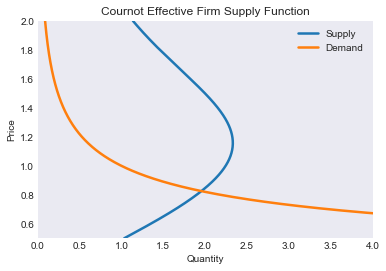

In [15]:
pplot = nodeunif(501, a, b)
demo.figure('Cournot Effective Firm Supply Function', 
            'Quantity', 'Price', [0, 4], [a, b])
plt.plot(5 * S(pplot), pplot, D(pplot), pplot)
plt.legend(('Supply','Demand'))

##### Figure 3: Approximation residuals for equation (5)

This block generates Figure 3.

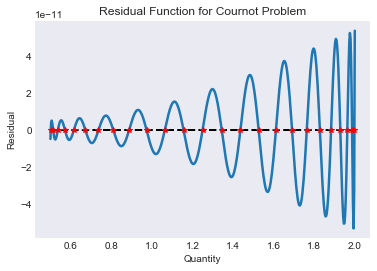

In [16]:
p = pplot 
demo.figure('Residual Function for Cournot Problem',
            'Quantity', 'Residual')
plt.hlines(0, a, b, 'k', '--', lw=2)
plt.plot(pplot, resid(S.c))
plt.plot(S.nodes,np.zeros_like(S.nodes),'r*');

##### Figure 4: Change in the effective supply as the number of firms increases
We now plot the effective supply for a varying number of firms; the result is shown in Figure 4.

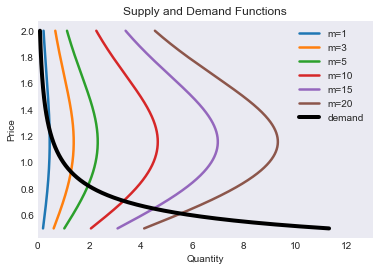

In [17]:
m = np.array([1, 3, 5, 10, 15, 20])
demo.figure('Supply and Demand Functions', 'Quantity', 'Price', [0, 13])
plt.plot(np.outer(S(pplot), m), pplot)
plt.plot(D(pplot), pplot, linewidth=4, color='black')
plt.legend(['m=1', 'm=3', 'm=5', 'm=10', 'm=15', 'm=20', 'demand']);

In Figure 4 notice how the equilibrium price and quantity change as the number of firms increases. 

##### Figure 5: Equilibrium price as a function of the number of firms

The last figure in this example (Figure 5), shows the equilibrium price as a function of the number of firms.

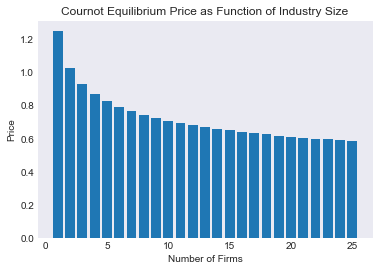

In [18]:
pp = (b + a) / 2
dp = (b - a) / 2
m  = np.arange(1, 26)
for i in range(50):
    dp /= 2
    pp = pp - np.sign(S(pp) * m - D(pp)) * dp

demo.figure('Cournot Equilibrium Price as Function of Industry Size', 
            'Number of Firms', 'Price')
plt.bar(m, pp);

# Example 3: Importing data from Internet

<br>
Oftentimes we need to keep track of some economic indicators. This work usually requires visiting the website of a data provider, looking for the required indicators, downloading the data (possibly in several different files), copying them to a common file, arranging them properly, and only after completing these cumbersome tasks, plotting them. If this work has to be done periodically then it is also necessary to thoroughly document each of these steps so we can replicate them exactly in the future. Needless to say, if it is necessary to do all these tasks with numerous indicators, the work ends up demanding a considerable amount of time and is prone to many errors.

<br>
To facilitate this work, we can use Python to download data available in Internet directly, thanks to packages such as [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/index.html). This is easily done when data providers supply an API ---application program interface--- which specifies how a language like Python can find the desired data.

<br>
Let us illustrate this with an example. Suppose we want recent data on economic growth for the member countries of the CMCA. The World Bank provides the relevant data in its “World Database”, which we can read with the `wb` module from `pandas_datareader`.

In [19]:
from pandas_datareader import wb

To be able to download data from the World Bank, we first need to know the exact code of the indicator we want to read. The first time we do this task we will not know this code, but we can look for it in the World Bank website or more easily from Python itself. For example, to find data on real GDP per capita, we run the following using the `.search` function:

In [20]:
wb.search('gdp.*capita.*const').iloc[:,:2]

,id,name
646,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation..."
7858,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$)
7860,NY.GDP.PCAP.KN,GDP per capita (constant LCU)
7862,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation..."
7863,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation..."


where the dot followed by an asterisk (.\*) indicates that any text in that position is a match. This function returns a data table with information about indicators that match the search criteria. In the preceding line, we use the code `.iloc[:,:2]` so that Python only prints the first two columns from that table.

<br>
After running that search, we choose the 'NY.GDP.PCAP.KD' indicator, whose description is “GDP per capita (constant 2010 US\$)”. We define a variable with a list of country codes of the CMCA countries:

In [21]:
paises = ['CR', 'DO', 'GT', 'HN', 'NI', 'SV']

and we proceed to reed data from 1991:

In [22]:
datos = wb.download(indicator='NY.GDP.PCAP.KD',
                    country=paises,start=1991, end=2016)

It is also possible to read data for more than one indicator in a single call to the `wb.download` function, writing their codes in a list (just like we did to read data on all six countries at once). In any case, we get a data table in panel format, where each columns corresponds to one of the indicators. For our example in particular, where we only read one indicator, it would be useful if the table was arranged so that each row correspond to a year and each column to a country. We can achieve it with this instruction:

In [23]:
GDP = datos.reset_index().pivot('year','country')

Once data is arrange this way, it is very easy to compute growth for all countries in a single step:

In [24]:
GROWTH = 100 * GDP.pct_change()

or to generate a formatted data table to be included in a \LaTeX document

In [25]:
#GROWTH.tail(6).round(2).to_latex('micuadro.tex')
print(GROWTH.tail(6).round(2).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{6}{l}{NY.GDP.PCAP.KD} \\
country &     Costa Rica & Dominican Republic & El Salvador & Guatemala & Honduras & Nicaragua \\
year &                &                    &             &           &          &           \\
\midrule
2011 &           3.06 &               1.81 &        3.34 &      1.94 &     1.89 &      5.03 \\
2012 &           3.59 &               1.42 &        2.34 &      0.80 &     2.24 &      5.24 \\
2013 &           1.13 &               3.59 &        1.89 &      1.54 &     0.99 &      3.72 \\
2014 &           2.40 &               6.35 &        1.49 &      2.03 &     1.29 &      3.60 \\
2015 &           2.55 &               5.79 &        1.87 &      2.03 &     2.08 &      3.60 \\
2016 &           3.10 &               5.41 &        2.06 &      1.04 &     2.02 &      3.50 \\
\bottomrule
\end{tabular}



In last instruction, the `.tail(6)` part indicates that we only want the last six observations, while the `.to_latex('micuadro.tex')` part exports that table to a file named 'micuadro.tex', which can later te included in a document. The  result of this code will look similar to this:

In [26]:
GROWTH.tail(6).round(2)

NY.GDP.PCAP.KD                                                    \
country     Costa Rica Dominican Republic El Salvador Guatemala Honduras   
year                                                                       
2011              3.06               1.81        3.34      1.94     1.89   
2012              3.59               1.42        2.34      0.80     2.24   
2013              1.13               3.59        1.89      1.54     0.99   
2014              2.40               6.35        1.49      2.03     1.29   
2015              2.55               5.79        1.87      2.03     2.08   
2016              3.10               5.41        2.06      1.04     2.02   

                   
country Nicaragua  
year               
2011         5.03  
2012         5.24  
2013         3.72  
2014         3.60  
2015         3.60  
2016         3.50

##### Figure 6: GDP per capita growth in CARD, 1992-2016
Finally, we plot the results in Figure 6. It is possible to enhance the aesthetic aspect of this figure by, for example, changing the legend position. Such enhancements are not presented here for space considerations.

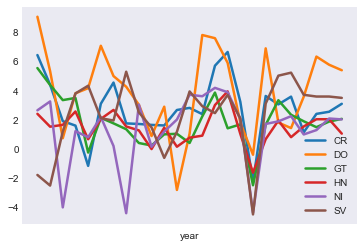

In [27]:
GROWTH.columns = paises
GROWTH.plot();

##### Figure 7: GDP per capita growth in CARD, by country, 2011-2016

It is also possible to plot each of the time series in a separate subplot, with the instruction

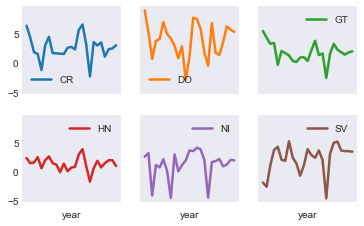

In [28]:
GROWTH.plot(subplots=True, layout=[2,3], sharey=True);

where we have specified that each time series should be plotted separately (`subplots=True`), be arranged in two rows and three columns (`layout=[2,3]`), and all subplots must have the same “y” axis (`sharey=True`, to facilitate country comparisons). 

# Example 4: Econometric estimations

<br>
The Python `statsmodels` package enable the estimation of many types of econometric models, although not as many as can be estimated using R. A simple illustration is the estimation of a Keynesian consumption function, 
\begin{equation*}
\ln(c_t) = \beta_0 + \beta_1 \ln(y_t) + \epsilon_t
\end{equation*}

where $c_t$ stands for consumption, $y_t$ income, $\epsilon$ a stochastic shock. In this case $\beta_1$ corresponds to the income elasticity of consumption.

<br>
Just like in the previous example, we will use `pandas-datareader` to import data from Internet. In this example we also import the `log` function from the `numpy` package to compute the logarithm of the data, as well as the `formula.api` module form `statsmodels` to estimate the model.

In [29]:
import pandas_datareader.data as web
from numpy import log
import statsmodels.formula.api as smf

Once this is done, we are ready to import data. In this example, we use quarterly data on consumption and production in the United States, available in [FRED](https://fred.stlouisfed.org/), a database from the Federal Reserve Bank of Saint Louis. For “consumption” we use the “PCEC” (Personal Consumption Expenditures) series, and for “income” we use “GDP” (Gross Domestic Product).

In [30]:
usdata = web.DataReader(['PCEC','GDP'],'fred', 1947, 2017)

After executing this instuction, the `usdata` variable points to a `pandas` data table, in which each column corresponds to a variable and each row to a quarter. We now estimate the model by ordinary least squares (`.ols`) and print a summary of the results

In [31]:
mod = smf.ols('PCEC ~ GDP', log(usdata)).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   PCEC   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.154e+05
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        18:27:34   Log-Likelihood:                 584.98
No. Observations:                 281   AIC:                            -1166.
Df Residuals:                     279   BIC:                            -1159.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6712      0.010    -64.053      0.0

Notice that the `.ols` function takes two arguments, the formula specifying the model, and the name of the data table containing the variables. In this code block we specify the data as `log(usdata)`, which tells Python that we want the logarithm of the data, saving us the task of generating another data table with the transformed data beforehand (as would be necessary in, for example, Stata). 

<br>
Alternatively, that line can also be written as
```
mod = smf.ols('log(PCEC) ~ log(GDP)', usdata).fit()
```
which is convenient in cases where not all variables must be transformed.

<br>
As it is expected in a regression of trending time series, the $R^2$ statistic is very close to one, and the Durbin-Watson statistic points to the high possibility of autocorrelation in the residuals. This document does not aim at being a guide of best practices in econometrics, but let us consider one last model in which consumption growth depends on income growth:
\begin{equation*}
\Delta\ln(c_t) = \beta_0 + \beta_1 \Delta\ln(y_t) + \epsilon_t
\end{equation*}

with we estimate in Python with

In [32]:
smf.ols('PCEC ~ GDP', log(usdata).diff()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PCEC   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     267.2
Date:                Sat, 28 Jul 2018   Prob (F-statistic):           1.50e-42
Time:                        18:27:34   Log-Likelihood:                 996.74
No. Observations:                 280   AIC:                            -1989.
Df Residuals:                     278   BIC:                            -1982.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0063      0.001      8.747      0.000       0.005       0.008
GDP            0.6130      0.038     16.346      0.000       0.539       0.687
==============================================================================
Omnibus:                      102.218   Durbin-Watson:                   2.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1087.804
Skew:                          -1.140   Prob(JB):                    6.11e-237
Kurtosis:                      12.383   Cond. No.                         90.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We notice that now the $R^2$ is no longer close to one, and that the Durbin-Watson statistic is closer to 2.0, indicating lack of autocorrelation. 

<br>
This last line of code, where we estimate the model with first-differenced data, highlights one of the reasons why code written in Python is so concise: it is not always necessary to store intermediate results in variable, because we can simply chain sevearal operations. In the case at hand, we have specified a model (`.ols`), estimated it (`.fit`) and gotten a table summarizing the results (`.summary`). Similarly, we have computed the logarithm (`log`) of data in `usdata` table, and to its result we have computed its first-difference (`.diff`). To better appreciate how concise this code is, let us compare that line with the following block, which takes 8 lines of code to perform the same operations:

```
usdata['lPCEC'] = log(usdata['PCEC'])
usdata['lGDP'] = log(usdata['GDP'])
usdata['dlPCEC'] = usdata['lPCEC'].diff()
usdata['dlGDP'] = usdata['lGDP'].diff()
model = smf.ols('dlPCEC ~ dlGDP', usdata)
results = model.fit()
table = results.summary()
print(table)
```


With results from last Table  at hand, we could predict that a one percentage point (p.p.) increase in GDP growth  would lead to a 0.618 p.p. increase in consumption growth. However, given that the data sample covers such a long period (nearly 70 years of quarterly observation), it is reasonable to wonder whether the parameters in this model are constant, given that several structural changes could have occurred along these years. One way to evaluate such posibility is to estimate the model with a rolling sample. In particular, we are going to estimate this model with 24 quarterly observations rolling window, changing the sample by one quarter in every step.

In this case, since we are going to need growth data many times, it is more efficient to compute growth data only once and store it in a `growth` variable. With the `[1:]` code we are dropping the first observation, which we lose when we compute the first-order difference (`.diff`). Furthermore, we use the `.shape` property from the table to find out how many observations  `T` we have, and then we set the window range to `h=24` observations:

In [33]:
growth = (100*log(usdata).diff())[1:]
T, nvar = growth.shape
h = 24

To faciliate next step, we define función `window_beta1`, which takes as its only argument the number of the last observation to be included in the estimation, and returns the value of the estimated GDP coefficient

In [34]:
def window_beta1(k):
    return smf.ols('PCEC~GDP',growth[k-h:k]).fit().params['GDP']

With this, we are ready to estimate the model many times, adding the results to the `growth` table as the `beta1` “indicator”. Plotting the results we get Figure 8, where we clearly see that the effect of GDP growth on consumption growth is quite unstable, and thus the predictions made with the simple model could be very poor.

##### Figure 8: Estimated effect of income over consumption, 24-observation rolling windows

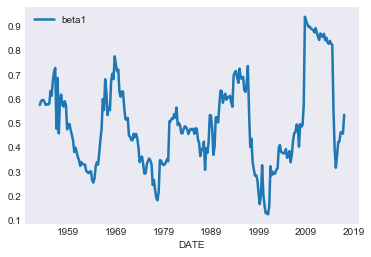

In [35]:
growth.loc[h-1:,'beta1'] = [window_beta1(k) for k in range(h,T+1)]
growth[['beta1']].plot();

# Ejemplo 5: Documentos dinámicos

<br>
To conclude this note, I let the reader know that the original (PDF) version of this document is an example of what is known as a “dynamic document”, in the sense that it was generated by interweaving \LaTeX code with Python code. The main benefit of this is that if in the future we need to update the previous examples (say to use updated data in the tables and graphs), it would suffice to rerun the code that generated that document (similarly to what we would do with this Jupyter notebook). It will not be necessary to use an Internet browser to get data, nor to copy-and-paste the graphs in the document.

<br>
Dynamic documents are extremely useful, because they enable significant time savings in the updating of periodic reports. Readers who are interested in learning how to create one of these documents will need to know \LaTeX and to review the [pythontex](https://www.ctan.org/pkg/pythontex) documentation.

# References

<br>
Judd, Kenneth L. (1998). [Numerical Methods in Economics](https://mitpress.mit.edu/books/numerical-methods-economics). MIT Press. isbn: 978-0-262-
10071-7.

<br>
Miranda, Mario J. and Paul L. Fackler (2002). [Applied Computational Economics and
Finance](https://mitpress.mit.edu/books/applied-computational-economics-and-finance). MIT Press. isbn: 0-262-13420-9.

<br>
Press, William H., Saul A. Teukolsky, and William T. Vetterling and Brian P. Flannery
(2007). [Numerical Recipes: The Art of Scientific Computing](http://www.numerical.recipes/). 3rd ed. Cambridge University Press. isbn: 978-0521880688.

<br>
Romero-Aguilar, Randall (2016). [CompEcon-Python](http://randall-romero.com/code/compecon/)
. url: http://randall-romero.com/code/compecon/.